In [1]:
import os
import tarfile
from six.moves import urllib
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"
HOUSING_PATH

'datasets\\housing'

In [2]:
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [3]:
fetch_housing_data()

In [4]:
import pandas as pd
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [5]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

<Axes: >

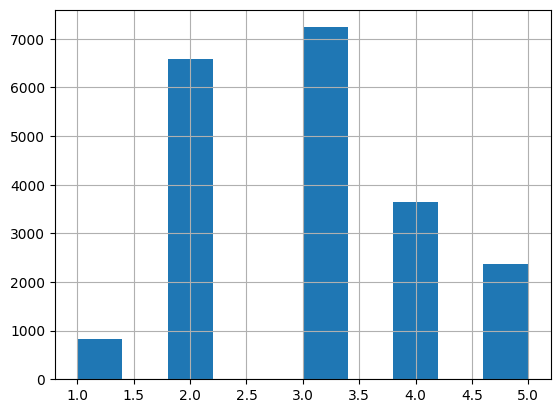

In [9]:
import numpy as np
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])
housing["income_cat"].hist()

In [10]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [11]:
strat_test_set['income_cat'].value_counts()/len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [12]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [13]:
housing = strat_train_set.copy()

<Axes: xlabel='longitude', ylabel='latitude'>

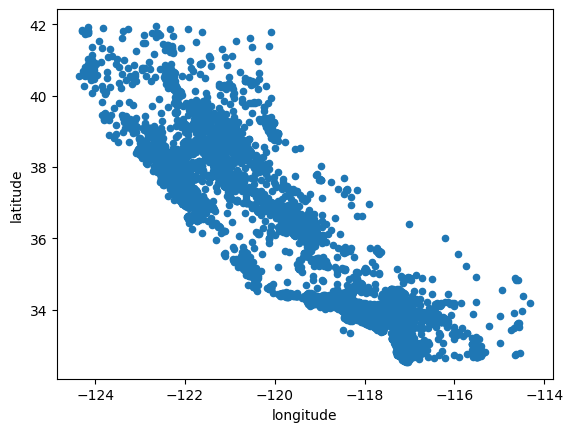

In [14]:
housing.plot(kind = "scatter", x = 'longitude', y = 'latitude')

<Axes: xlabel='longitude', ylabel='latitude'>

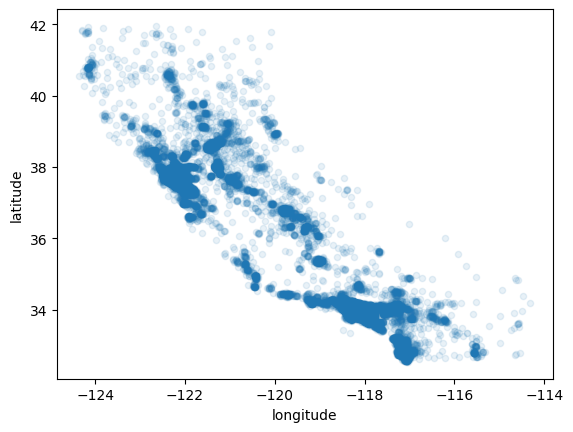

In [15]:
housing.plot(kind = "scatter", x = 'longitude', y = 'latitude', alpha = 0.1)

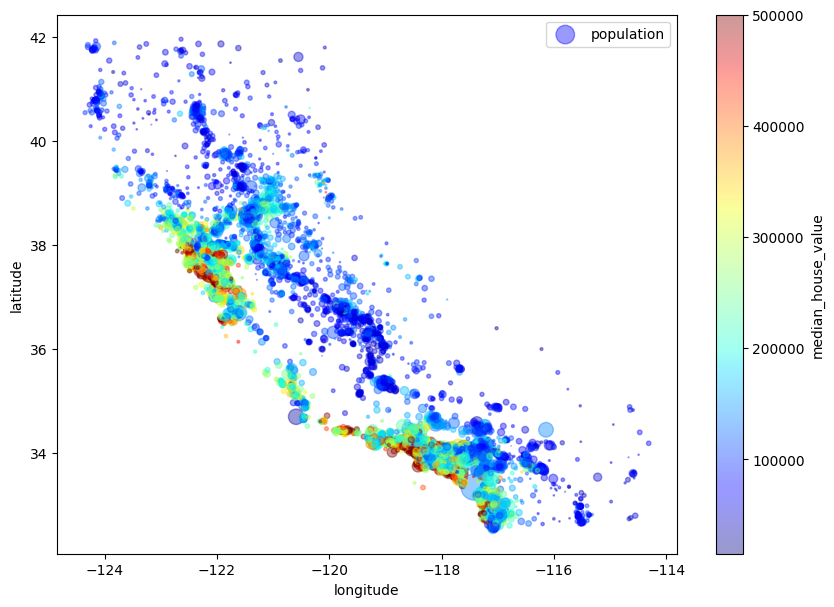

In [16]:
import matplotlib.pyplot as plt
housing.plot(kind = 'scatter', x='longitude', 
             y='latitude', alpha=0.4,s = housing['population']/100, 
             label = "population", figsize = (10,7), 
             c ='median_house_value', cmap = plt.get_cmap('jet'),
             colorbar = True)
plt.legend()

In [17]:
corr_matrix =housing.corr(numeric_only = True)

In [18]:
corr_matrix['median_house_value'].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

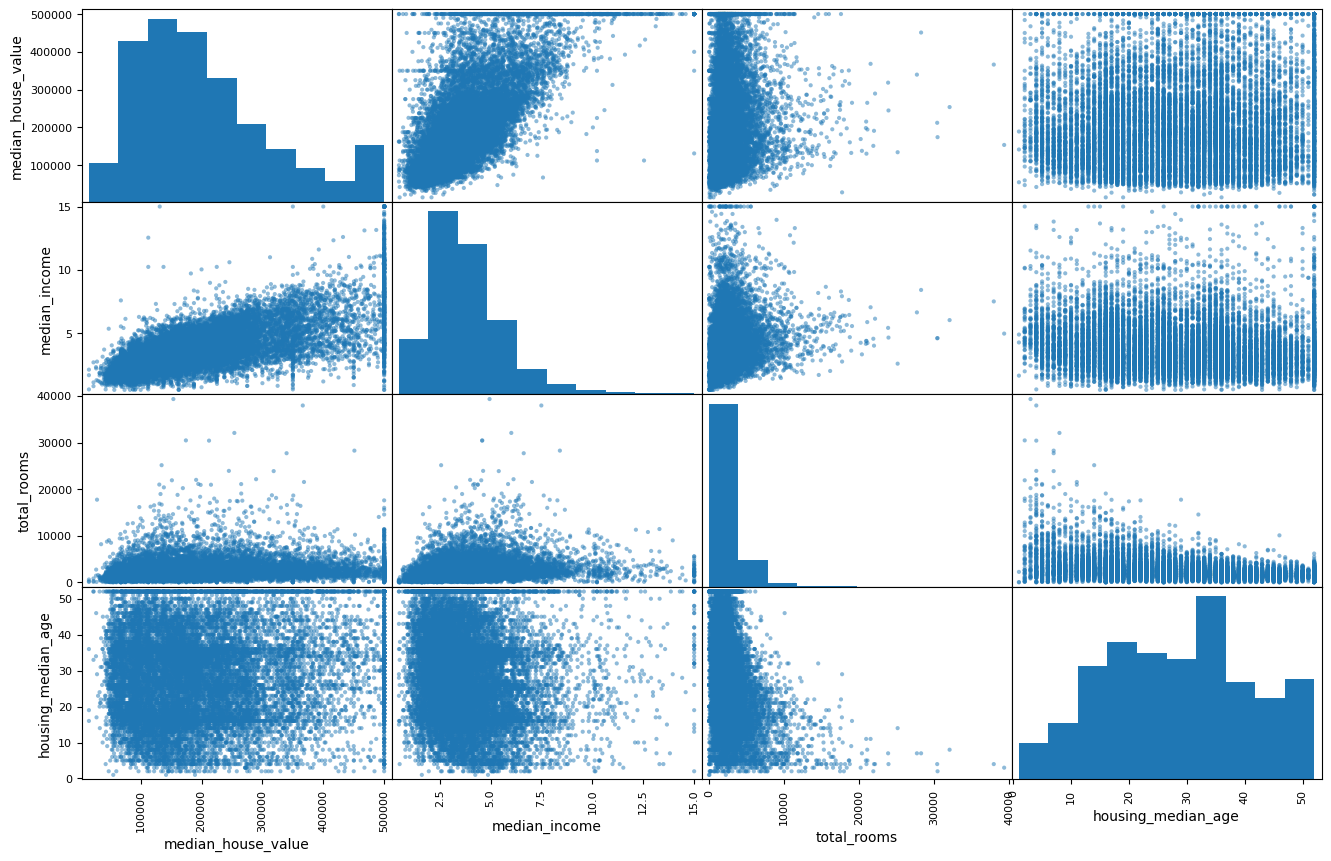

In [19]:
attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
pd.plotting.scatter_matrix(housing[attributes], figsize=(16,10))
plt.show()

<Axes: xlabel='median_income', ylabel='median_house_value'>

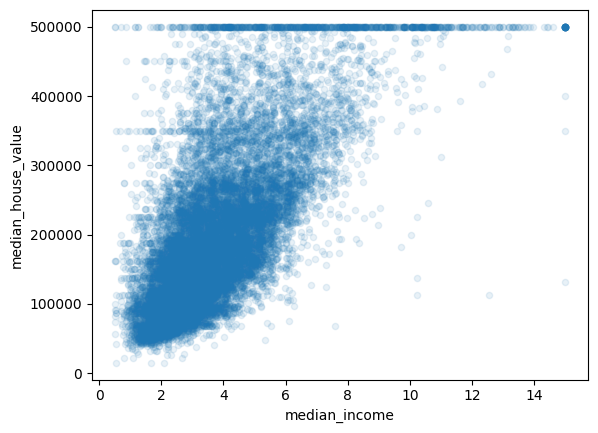

In [20]:
housing.plot(kind = 'scatter', x='median_income',y='median_house_value', alpha =0.1)

In [21]:
housing['rooms_per_household'] = housing['total_rooms'] / housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms'] / housing['total_rooms']
housing['population_per_household'] = housing['population']/housing['households']

In [22]:
corr_matrix = housing.corr(numeric_only = True)
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

In [23]:
housing = strat_train_set.drop("median_house_value", axis = 1)
housing_labels = strat_train_set['median_house_value'].copy()

In [24]:
median = housing['total_bedrooms'].median()
housing['total_bedrooms'].fillna(median, inplace = True)

In [25]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

In [26]:
housing_num = housing.drop('ocean_proximity', axis = 1)
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [27]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [28]:
housing_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [29]:
X = imputer.transform(housing_num)

In [30]:
housing_tr = pd.DataFrame(X, columns = housing_num.columns)
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
1,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
3,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
4,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964
...,...,...,...,...,...,...,...,...
16507,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900
16508,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139
16509,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797
16510,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964


In [31]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


In [32]:
from sklearn.preprocessing import OrdinalEncoder
ordinalencoder = OrdinalEncoder()

In [33]:
housing_cat_encoded = ordinalencoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [34]:
ordinalencoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [35]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [36]:
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [37]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [38]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [39]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([('imputer', SimpleImputer(strategy='median')),
                         ('attribs_adder', CombinedAttributesAdder()),
                         ('std_scaler', StandardScaler())
                ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [40]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ['ocean_proximity']

full_pipeline = ColumnTransformer([('num', num_pipeline, num_attribs),
                                   ('cat', OneHotEncoder(), cat_attribs)
                            ])

housing_prepared = full_pipeline.fit_transform(housing)


In [41]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [42]:
some_data = housing.iloc[:5]
some_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN


In [43]:
some_labels = housing_labels.iloc[:5]
some_labels

12655     72100.0
15502    279600.0
2908      82700.0
14053    112500.0
20496    238300.0
Name: median_house_value, dtype: float64

In [44]:
some_data_prepared = full_pipeline.transform(some_data)
print(f'predictions: {lin_reg.predict(some_data_prepared)}')

predictions: [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]


In [45]:
print(f'Labels: {list(some_labels)}')

Labels: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [46]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68627.87390018745

In [47]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [48]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [49]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring='neg_mean_squared_error', cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [50]:
def display_scores(scores):
    print(f'Scores:{scores}')
    print(f'Mean:{scores.mean()}')
    print(f'SD:{scores.std()}')

In [51]:
display_scores(tree_rmse_scores)

Scores:[73928.11180336 70242.676056   68374.44696039 70234.95787351
 69121.5445234  78056.55528183 71358.41327871 72453.8581941
 67427.6713263  71519.13541665]
Mean:71271.73707142255
SD:2906.6226282777743


In [52]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring='neg_mean_squared_error', cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores:[71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
Mean:69104.07998247063
SD:2880.3282098180666


In [53]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor()

In [54]:
housing_predictions = forest_reg.predict(housing_prepared)

In [55]:
forest_rmse = np.sqrt(mean_squared_error(housing_labels, housing_predictions ))
forest_rmse

18550.49852696112

In [56]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring='neg_mean_squared_error', cv=10 )
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores:[51373.51431829 49083.40927437 46967.86351517 51925.4673528
 47268.99068009 52233.26245362 52377.86942593 49793.56217052
 48721.9710789  54066.99770401]
Mean:50381.290797370566
SD:2247.013807980596


In [57]:
import joblib

In [58]:
joblib.dump(lin_reg, 'lin_reg.pkl')

['lin_reg.pkl']

In [59]:
joblib.dump(tree_reg, "tree_reg.pkl")
joblib.dump(forest_reg, "forest_reg.pkl")

['forest_reg.pkl']

In [60]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'n_estimators':[3, 10, 30], 'max_features':[2,4,6,8]},
              {'bootstrap': [False], 'n_estimators': [3,10], 'max_features':[2,3,4]},
              ]

In [61]:
forest_reg = RandomForestRegressor()

In [62]:
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, 
                           scoring= 'neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [63]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [64]:
cv_res = grid_search.cv_results_

In [65]:
for mean_score, params in zip(cv_res['mean_test_score'], cv_res['params']):
    print(np.sqrt(-mean_score), params)

64829.35775695302 {'max_features': 2, 'n_estimators': 3}
55694.54412851646 {'max_features': 2, 'n_estimators': 10}
52847.375819972294 {'max_features': 2, 'n_estimators': 30}
60225.297482806425 {'max_features': 4, 'n_estimators': 3}
52677.481356968114 {'max_features': 4, 'n_estimators': 10}
50549.92659793138 {'max_features': 4, 'n_estimators': 30}
58983.41347571983 {'max_features': 6, 'n_estimators': 3}
51899.36064272497 {'max_features': 6, 'n_estimators': 10}
49991.556480656014 {'max_features': 6, 'n_estimators': 30}
59145.27830358847 {'max_features': 8, 'n_estimators': 3}
51736.48173904383 {'max_features': 8, 'n_estimators': 10}
50123.704327611646 {'max_features': 8, 'n_estimators': 30}
61871.877957790755 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54925.12907338771 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59456.27934844934 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52117.641548213964 {'bootstrap': False, 'max_features': 3, 'n_estimato

In [66]:
feature_importance = grid_search.best_estimator_.feature_importances_
feature_importance

array([7.61991203e-02, 6.92029511e-02, 4.23084160e-02, 1.76966034e-02,
       1.61141164e-02, 1.71627846e-02, 1.59990781e-02, 3.29442406e-01,
       5.44823828e-02, 1.04561426e-01, 8.42720461e-02, 1.30463093e-02,
       1.47565122e-01, 7.32536082e-05, 3.83899690e-03, 8.03498807e-03])

In [67]:
extra_attribs = ['rooms_per_hhold', 'pop_per_hhold', 'bedrooms_per_room']
cat_encoder = full_pipeline.named_transformers_['cat']
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importance, attributes), reverse=True)

[(0.32944240587612905, 'median_income'),
 (0.14756512171197858, 'INLAND'),
 (0.10456142576698695, 'pop_per_hhold'),
 (0.08427204608877803, 'bedrooms_per_room'),
 (0.07619912026930308, 'longitude'),
 (0.0692029511246019, 'latitude'),
 (0.054482382764068804, 'rooms_per_hhold'),
 (0.04230841602933489, 'housing_median_age'),
 (0.017696603380900608, 'total_rooms'),
 (0.017162784598039695, 'population'),
 (0.016114116441749465, 'total_bedrooms'),
 (0.01599907811584816, 'households'),
 (0.01304630926223007, '<1H OCEAN'),
 (0.008034988066370301, 'NEAR OCEAN'),
 (0.003838996895500189, 'NEAR BAY'),
 (7.325360818012593e-05, 'ISLAND')]

In [68]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis = 1)
y_test = strat_test_set['median_house_value'].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_prediction = final_model.predict(X_test_prepared)

final_rmse = np.sqrt(mean_squared_error(y_test, final_prediction))
final_rmse

47810.16875661534

In [69]:
from scipy import stats

confidence = 0.95
squared_errors = (final_prediction - y_test)**2
np.sqrt(stats.t.interval(confidence, len(squared_errors)-1,
                         loc=squared_errors.mean(),
                         scale = stats.sem(squared_errors)))

array([45834.05441551, 49707.78539533])